In [2]:
import pandas as pd
import numpy as  np 
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [5]:
dataset = pd.read_csv('../datasets/house/train.csv')
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
def create_scrollable_table(df,table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:300px; overflow:auto;">'
    html += df.to_html()
    return html

In [8]:
numerical_features = dataset.select_dtypes(include=[np.number])
numerical_features.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [16]:
# Getting all numerical features
numerical_features = dataset.select_dtypes(include=[np.number])
summary_stats = numerical_features.describe().T

In [19]:
#  Using the above function to create a scrollable table 
html_numerical = create_scrollable_table(summary_stats,'numerical_features','Summary statistics for numerical features')

In [20]:
display(HTML(html_numerical))

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [21]:
dataset.shape

(1460, 81)

In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [26]:
# null values
null_values = dataset.isnull().sum()
html_null_values = create_scrollable_table(null_values.to_frame(),'null_values','Null values in the dataset')
display(HTML(html_null_values))


# Percentage of the missing values for each features
missing_percentage = (dataset.isnull().sum()/len(dataset)) * 100
html_missing_percentage = create_scrollable_table(missing_percentage.to_frame(),'missing_percentage','Converting the null values to percentage')
display(HTML(html_missing_percentage))

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
Street,0
Alley,1369
LotShape,0
LandContour,0
Utilities,0


,0
Id,0.000000
MSSubClass,0.000000
MSZoning,0.000000
LotFrontage,17.739726
LotArea,0.000000
Street,0.000000
Alley,93.767123
LotShape,0.000000
LandContour,0.000000
Utilities,0.000000


In [28]:
rows_with_missing_values = dataset[dataset.isnull().any(axis =1)]
html_rows_with_missing_values = create_scrollable_table(rows_with_missing_values.head(),'rows_with_missing_values','Forming a table for the missing values')
display(HTML(html_rows_with_missing_values))
                                                    

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [29]:
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Explore the values


In [ ]:
import scipy.stats as stats


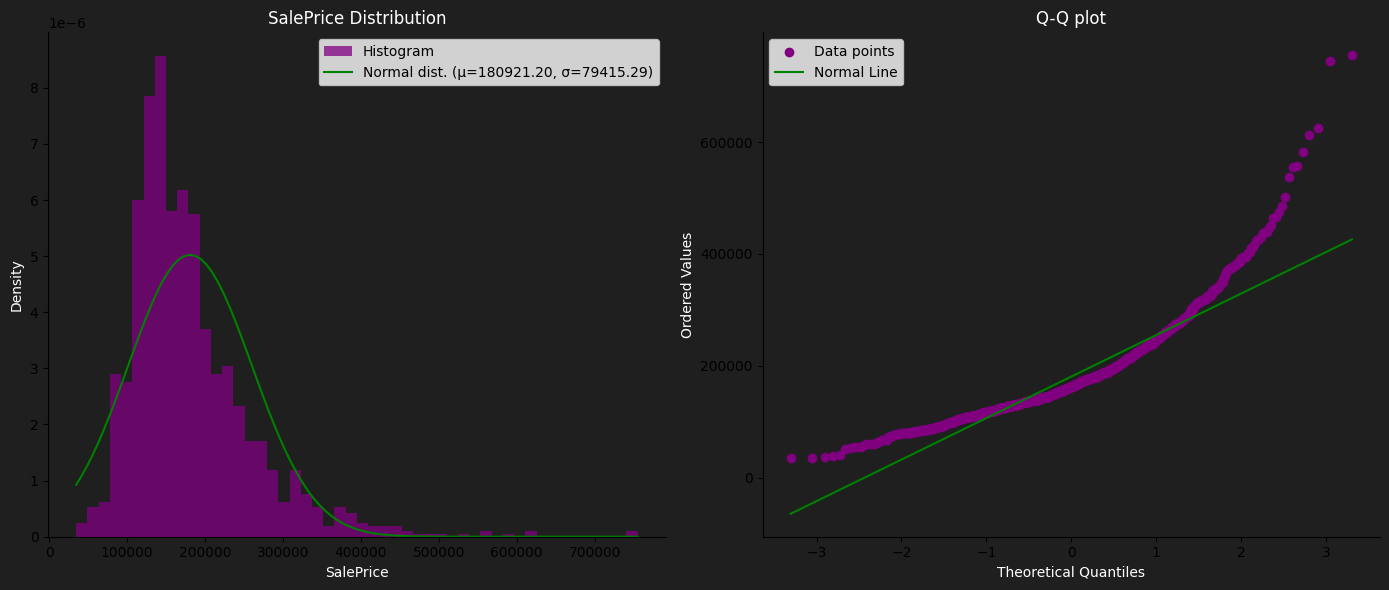

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming df['SalePrice'] is your data
sale_price = dataset['SalePrice']

# Fit a normal distribution to the SalePrice data
mu, sigma = stats.norm.fit(sale_price)

# Create a histogram of the SalePrice column with the normal distribution overlay
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot the histogram
n, bins, patches = ax[0].hist(sale_price, bins=50, density=True, color='purple', alpha=0.75, label="Histogram")

# Calculate the normal distribution curve
x_norm = np.linspace(sale_price.min(), sale_price.max(), 100)
y_norm = stats.norm.pdf(x_norm, mu, sigma)
ax[0].plot(x_norm, y_norm, color='green', label=f"Normal dist. (μ={mu:.2f}, σ={sigma:.2f})")

# Customize the plot
ax[0].set_title("SalePrice Distribution", color='white')
ax[0].set_xlabel("SalePrice", color='white')
ax[0].set_ylabel("Density", color='white')
ax[0].legend(loc="best")
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].set_facecolor((0.12, 0.12, 0.12))

# Q-Q plot
qq_data = stats.probplot(sale_price, dist="norm")
ax[1].scatter(qq_data[0][0], qq_data[0][1], color='purple', label="Data points")

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = stats.linregress(qq_data[0][0], qq_data[0][1])
line_x = np.array(qq_data[0][0])
line_y = intercept + slope * line_x

# Add the line of best fit
ax[1].plot(line_x, line_y, color='green', label="Normal Line")

# Customize the Q-Q plot
ax[1].set_title("Q-Q plot", color='white')
ax[1].set_xlabel("Theoretical Quantiles", color='white')
ax[1].set_ylabel("Ordered Values", color='white')
ax[1].legend(loc="best")
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].set_facecolor((0.12, 0.12, 0.12))

# Adjust figure layout and background color
fig.patch.set_facecolor((0.12, 0.12, 0.12))
plt.tight_layout()
plt.show()


## What questions do we want to ask of the data ?
1. Distribution of dwelling types anf their relation to sales price
2. Does zoning impact sales price?
3. Does street and alley access type effect on sales price?
4. What is the Average sale price be property shape?
5. Is there a Correlation between Property Age and Sales Price
6. Is there a Correaltion between living Area and Sales Price
7. Does price change year to year?

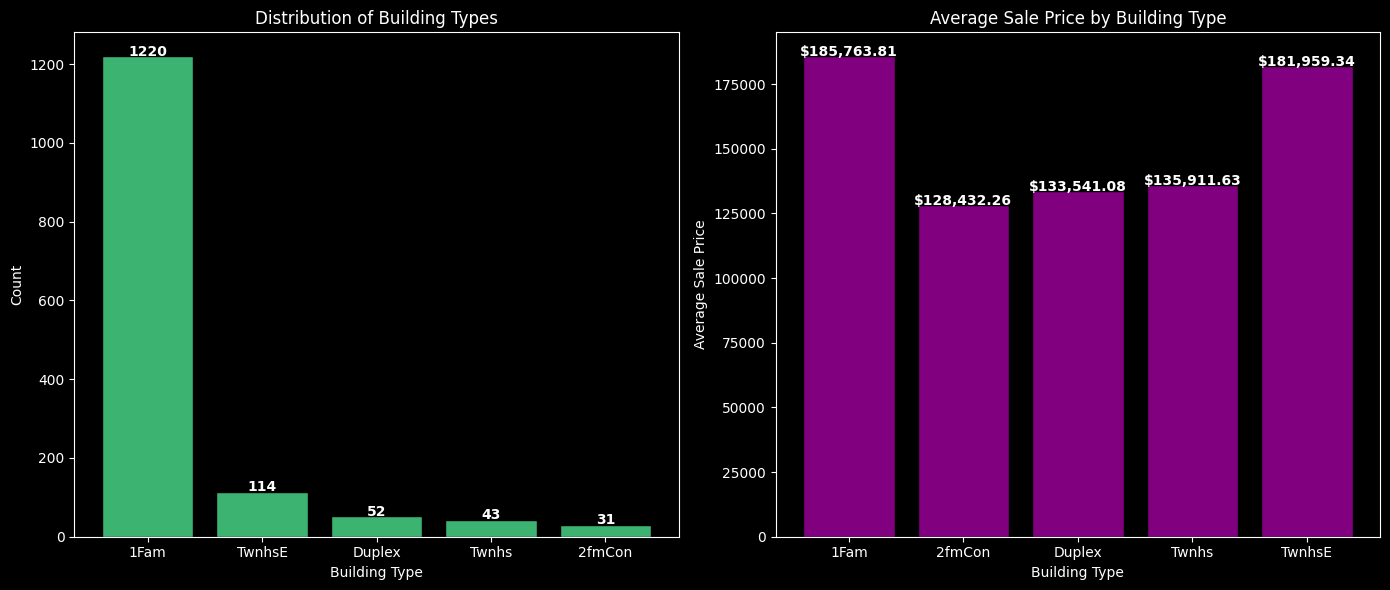

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a dark background style
plt.style.use('dark_background')

# Get the data for distribution of dwelling types and average sale prices by dwelling type
dwelling_types = dataset['BldgType'].value_counts()
dwelling_prices = dataset.groupby('BldgType')['SalePrice'].mean()
# print(dwelling_prices)
# 1. Plotting Distribution of Dwelling Types
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First bar chart: Distribution of Building Types
axes[0].bar(dwelling_types.index, dwelling_types.values, color='mediumseagreen', edgecolor='black')
axes[0].set_title('Distribution of Building Types')
axes[0].set_xlabel('Building Type')
axes[0].set_ylabel('Count')
axes[0].grid(False)  # Disable grid to match background style

# Adding value labels on top of bars for fig1
for i, v in enumerate(dwelling_types.values):
    axes[0].text(i, v + 1, str(v), ha='center', color='white', fontweight='bold')

# 2. Plotting Average Sale Price by Building Type
# Format labels for the second bar chart
formatted_dwelling_prices = ['$' + f'{value:,.2f}' for value in dwelling_prices.values]

axes[1].bar(dwelling_prices.index, dwelling_prices.values, color='purple', edgecolor='black')
axes[1].set_title('Average Sale Price by Building Type')
axes[1].set_xlabel('Building Type')
axes[1].set_ylabel('Average Sale Price')
axes[1].grid(False)  # Disable grid to match background style

# Adding value labels on top of bars for fig2
for i, v in enumerate(dwelling_prices.values):
    axes[1].text(i, v, formatted_dwelling_prices[i], ha='center', color='white', fontweight='bold')

# Set the layout and show the plot
plt.tight_layout()
plt.show()


Zoning is a set of laws and regulations that divide a city or town into zones and control how the land within each zone can be used

THe codes are:
* **C(all)** : `Commercial`
* **FV** : `Floating Village Residential`
* **RH** : `Residential High Density`
* **RL** : `Residential Low Density`
* **RM** : `Residential Medium Density`

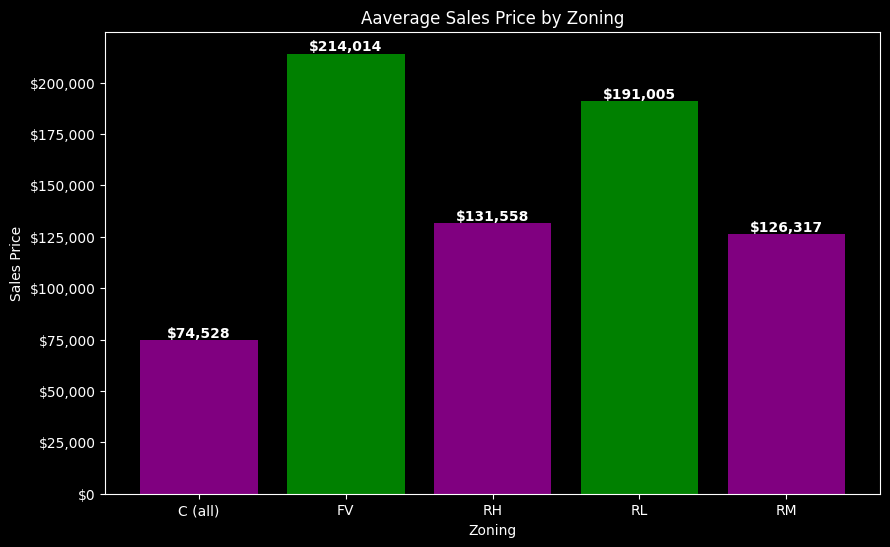

In [40]:
zoning_prices = dataset.groupby('MSZoning')['SalePrice'].mean()

fig,ax = plt.subplots(figsize=(10,6))

bars = ax.bar(zoning_price.index,zoning_price.values,color=['purple','green'])
ax.set_title('Aaverage Sales Price by Zoning')
ax.set_xlabel('Zoning')
ax.set_ylabel('Sales Price')


ax.yaxis.set_major_formatter('${:,.0f}'.format)

# Adding value labels on top of bars
for bar, price in zip(bars, zoning_prices.values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'${price:,.0f}',
            ha='center', va='bottom', color='white', fontweight='bold')


plt.show()
